# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### The dataset collected is related to 17 campaigns that occurred between May 2008 and November 2010, corresponding to a total of 79354 contacts.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay, recall_score, f1_score, auc, roc_curve,roc_auc_score

In [2]:
file_path = 'data/bank-additional-full.csv'
df = pd.read_csv(file_path,sep=';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [5]:
# Find if any columns have null values
null_counts = df.isnull().sum()
# Print the result
null_counts

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

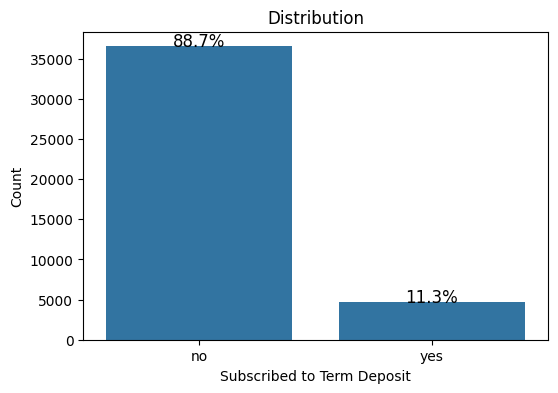

In [6]:
# Check class distribution
class_counts = df['y'].value_counts()
total = class_counts.sum()
percentages = (class_counts / total) * 100  # Calculate percentage



# Visualize class imbalance
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=class_counts.index, y=class_counts.values)

# Add percentage labels
for i, (count, percent) in enumerate(zip(class_counts.values, percentages)):
    ax.text(i, count + 1, f"{percent:.1f}%", ha="center", fontsize=12)

plt.title("Distribution")
plt.xlabel("Subscribed to Term Deposit")
plt.ylabel("Count")
plt.show()

It is clear that this dataset is imbalanced.

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

The business objective of this exercise is to create a predictive model which will predict whether a customer will subscribe to a term deposit account using the above features.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

I will change the label type from yes/no strings to boolean. I am also going to drop the duration feature, as per the above note.

Then I will look at all the categorical features. The best way is to do bar chart and see if the values vary between each other. If they don't then possibly they can be dropped or combined.

In [8]:
# Changes y label from object to boolean type
df["y"] = df["y"].map({"yes": True, "no": False}).astype(bool)
df.drop(columns=["duration"], inplace=True)
df = df.dropna()

#### Categorical Features

y
False    36548
True      4640
Name: count, dtype: int64


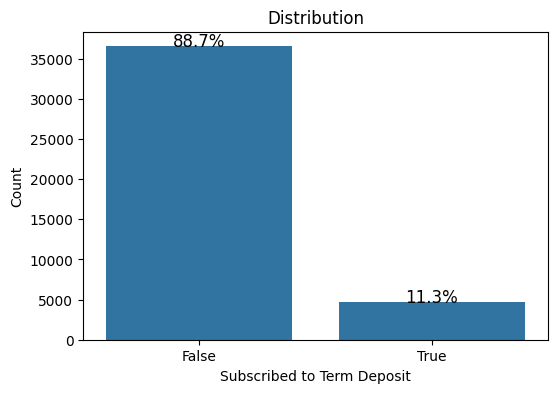

In [9]:
# Check class distribution
class_counts = df['y'].value_counts()
total = class_counts.sum()
percentages = (class_counts / total) * 100  # Calculate percentage
print(class_counts)


# Visualize class imbalance
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=class_counts.index, y=class_counts.values)

# Add percentage labels
for i, (count, percent) in enumerate(zip(class_counts.values, percentages)):
    ax.text(i, count + 1, f"{percent:.1f}%", ha="center", fontsize=12)

plt.title("Distribution")
plt.xlabel("Subscribed to Term Deposit")
plt.ylabel("Count")
plt.show()

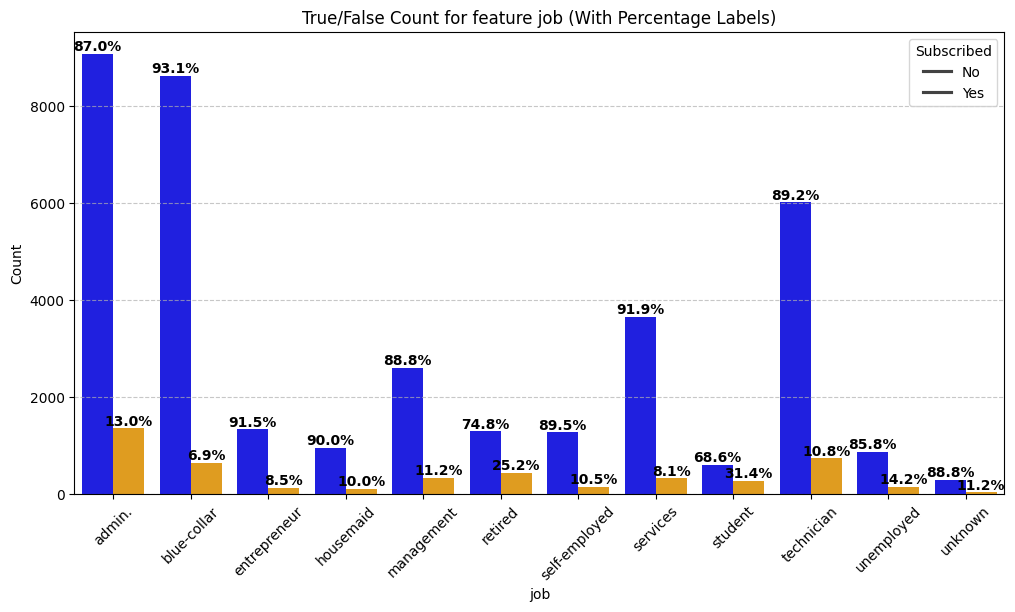

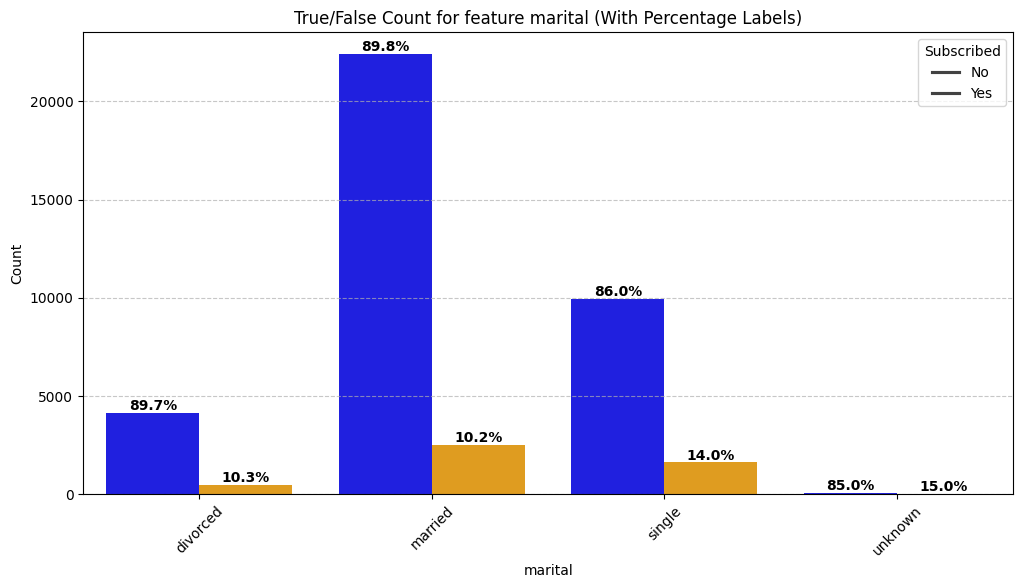

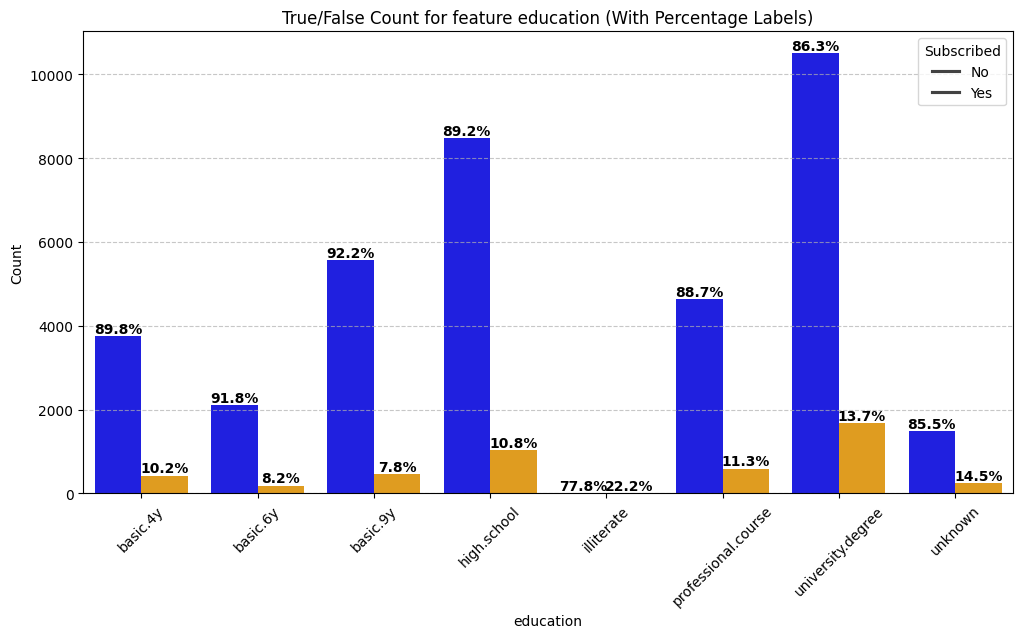

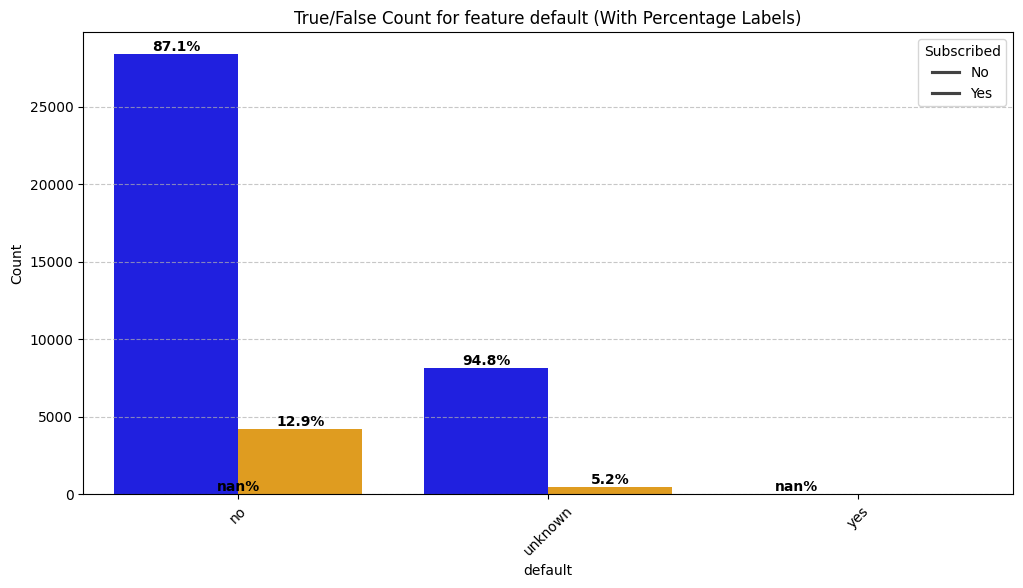

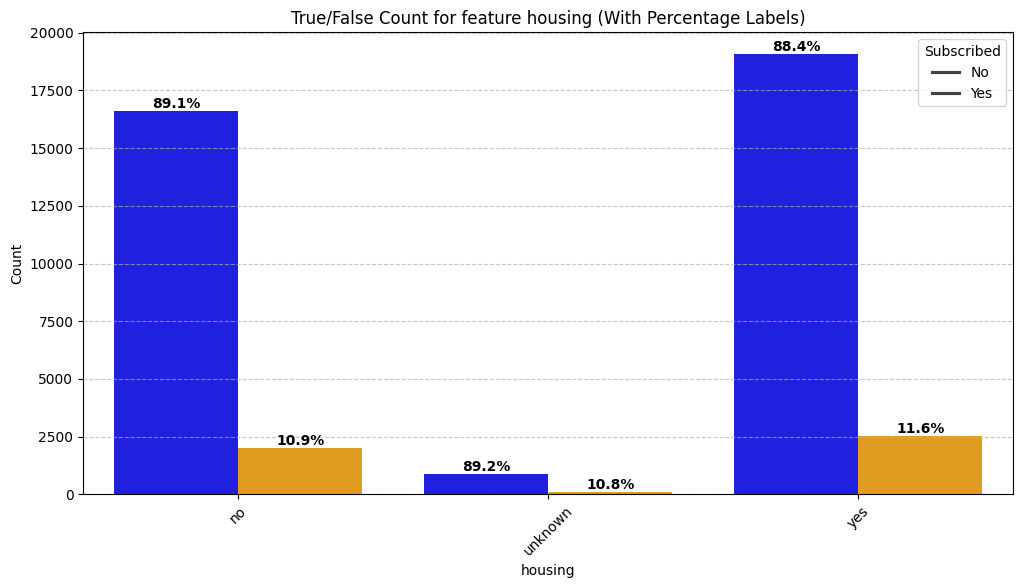

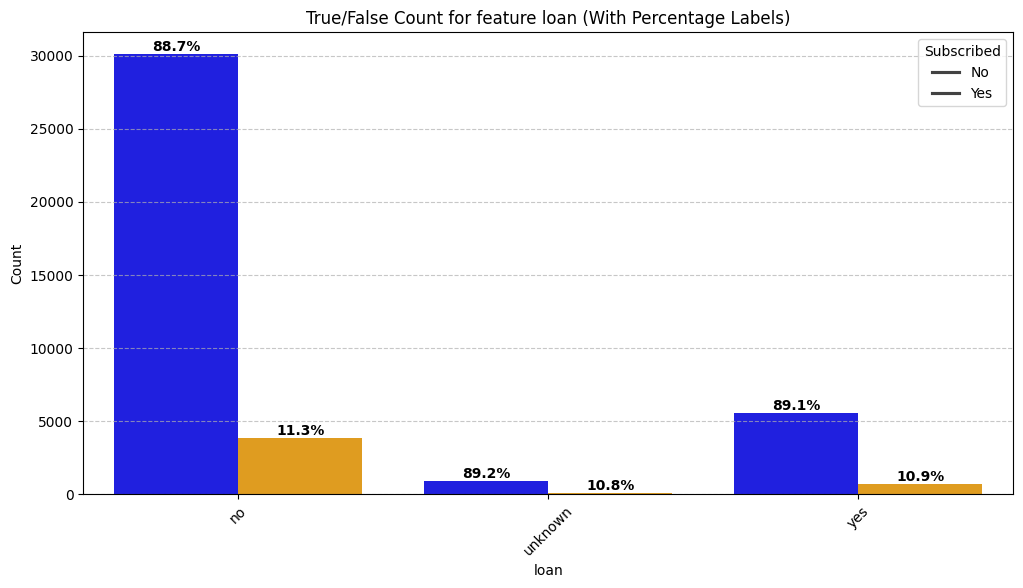

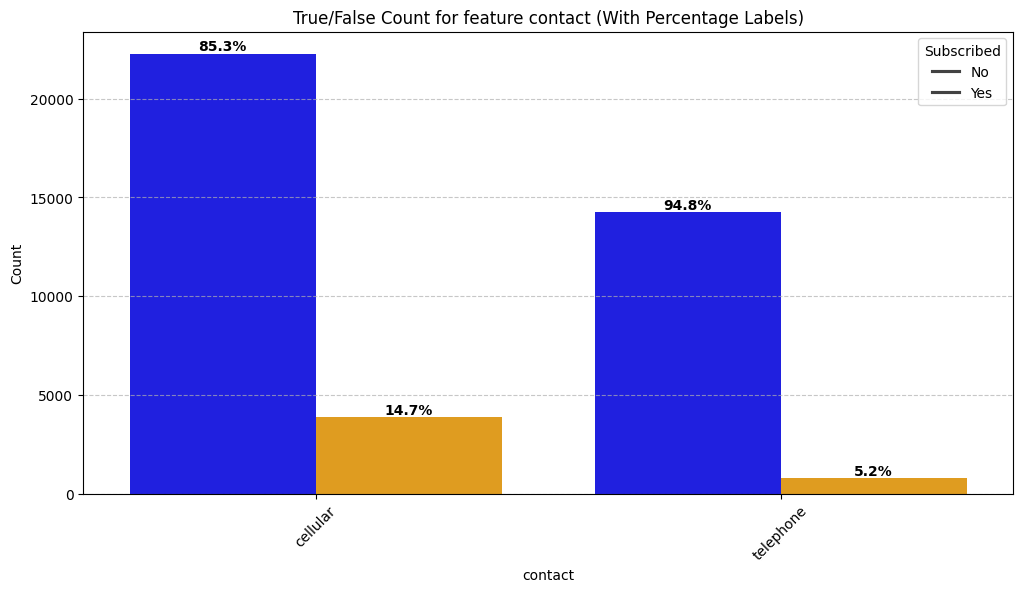

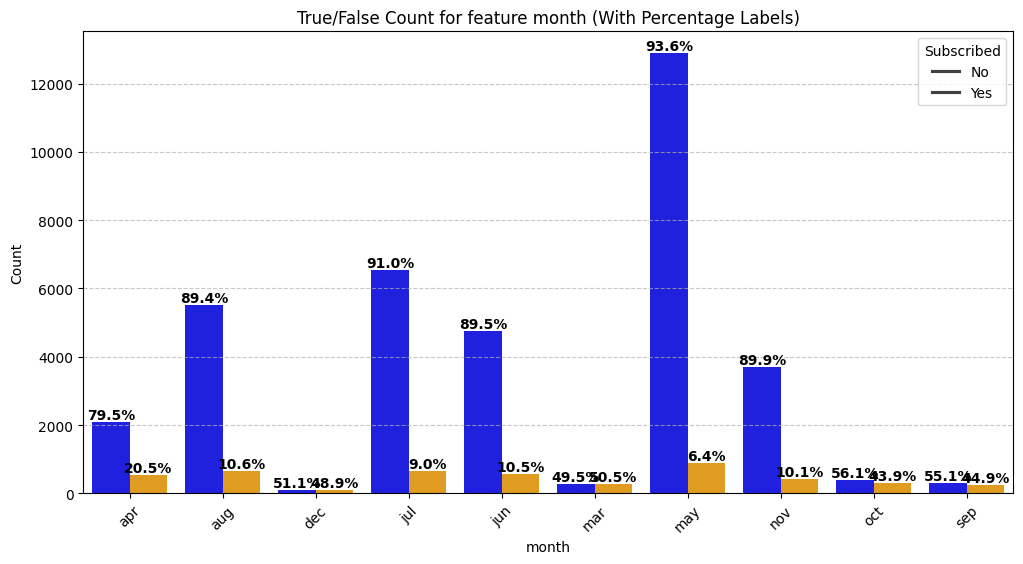

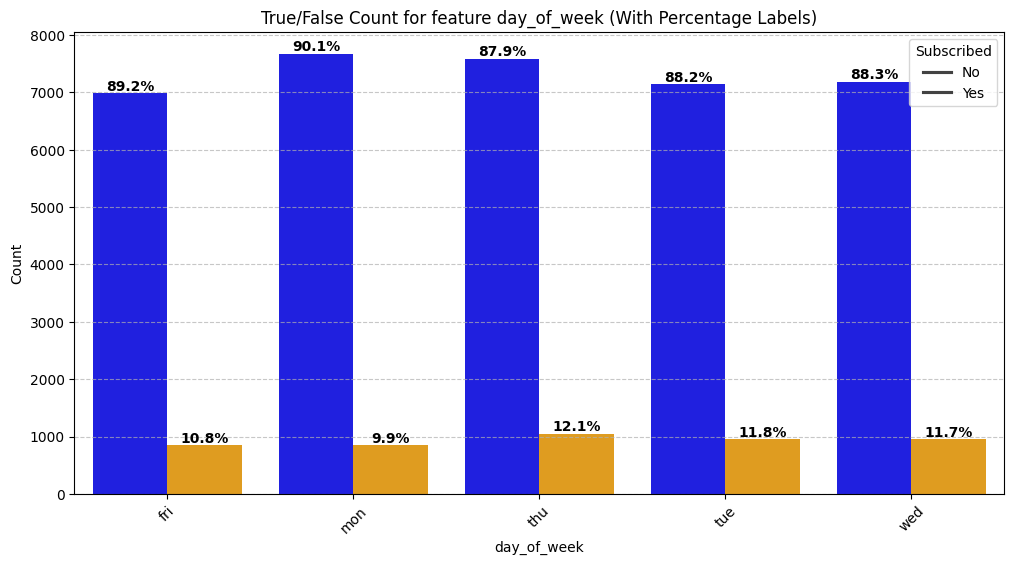

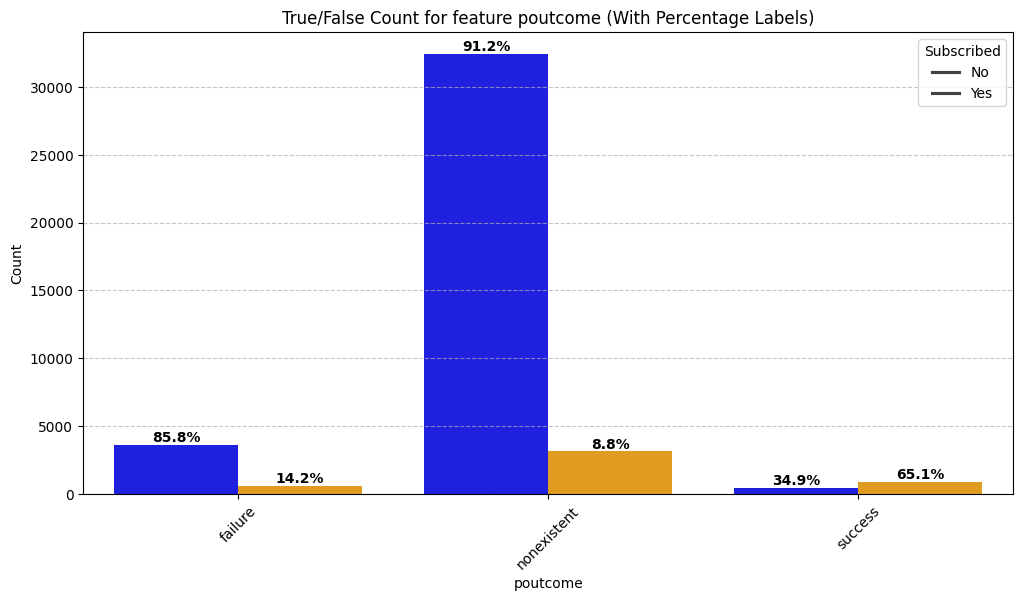

In [10]:
categorical_features = ["job","marital","education","default","housing","loan","contact","month","day_of_week","poutcome"]

for feature in categorical_features:
    # Get counts of True and False for each job
    summary = df.groupby(feature)["y"].value_counts().unstack().reset_index()
    summary.columns.name = None  # Remove column name "y"
    summary.columns = [feature, "False_count", "True_count"]  # Rename columns

    # Reshape DataFrame for seaborn
    plot_data = summary.melt(id_vars=feature, value_vars=["False_count", "True_count"], var_name="Category", value_name="Count")

    # Plot using Seaborn
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=feature, y="Count", hue="Category", data=plot_data, palette={"False_count": "blue", "True_count": "orange"})

# Annotate each bar with the percentage
    i=0
    dbl=int(len(plot_data)/2)
    for p in ax.patches:
        if i<len(plot_data):
            height = p.get_height()  # Bar height
        # Annotate above the bar
            if i < len(plot_data)/2:
                percent=(plot_data.iloc[i, 2]/(plot_data.iloc[i, 2]+plot_data.iloc[i+dbl, 2]))*100
            else:
                percent=(plot_data.iloc[i, 2]/(plot_data.iloc[i, 2]+plot_data.iloc[i-dbl, 2]))*100
                 
            ax.annotate(f'{percent:.1f}%', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=10, color='black', weight='bold')
            i=i+1


    # Final formatting
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(f"True/False Count for feature {feature} (With Percentage Labels)")
    plt.xticks(rotation=45)  # Rotate job labels for better readability
    plt.legend(title="Subscribed", labels=["No", "Yes"])
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    plt.show()

Looking at results of some of the categorical features

- For Marital Feature, as the number of unknowns is so small, and seems to match distribution of single, I will merge them. THis is like saying default value is single unless otherwise stated. The same goes for Job, where the unknown count is so small, but the false/true breakdown matches managemenrt.
- I am also going to say that the False/True ratio seems to vary very little for each day of the week, and approximately matches the target's ratio, so I think we could drop this column
- The months column is interesting. The False/True ratio is markedly different for Dec, Mar, Oct, and September to the other months. So I will ordinal encode this column, grouping the above mentioned months together. 

In [11]:
df["marital"].value_counts(dropna=False)
df["job"].value_counts(dropna=False)

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [12]:
df["marital"] = df["marital"].replace("unknown", "single")
df["job"] = df["job"].replace("unknown", "management")
df.drop(columns=["day_of_week"], inplace=True)
month_order = {'jan': 1, 'feb': 1, 'mar': 3, 'apr': 1, 'may': 1, 'jun': 1,
               'jul': 1, 'aug': 1, 'sep': 3, 'oct': 3, 'nov': 1, 'dec': 3}
df['month'] = df['month'].map(month_order)

#### Numerical Featues
I will do a pairplot of numerical features to see if there is any correlation which could mean a feature could be dropped. Can't do all of them so will do most likely ones IE age and the macro  financial indicators.

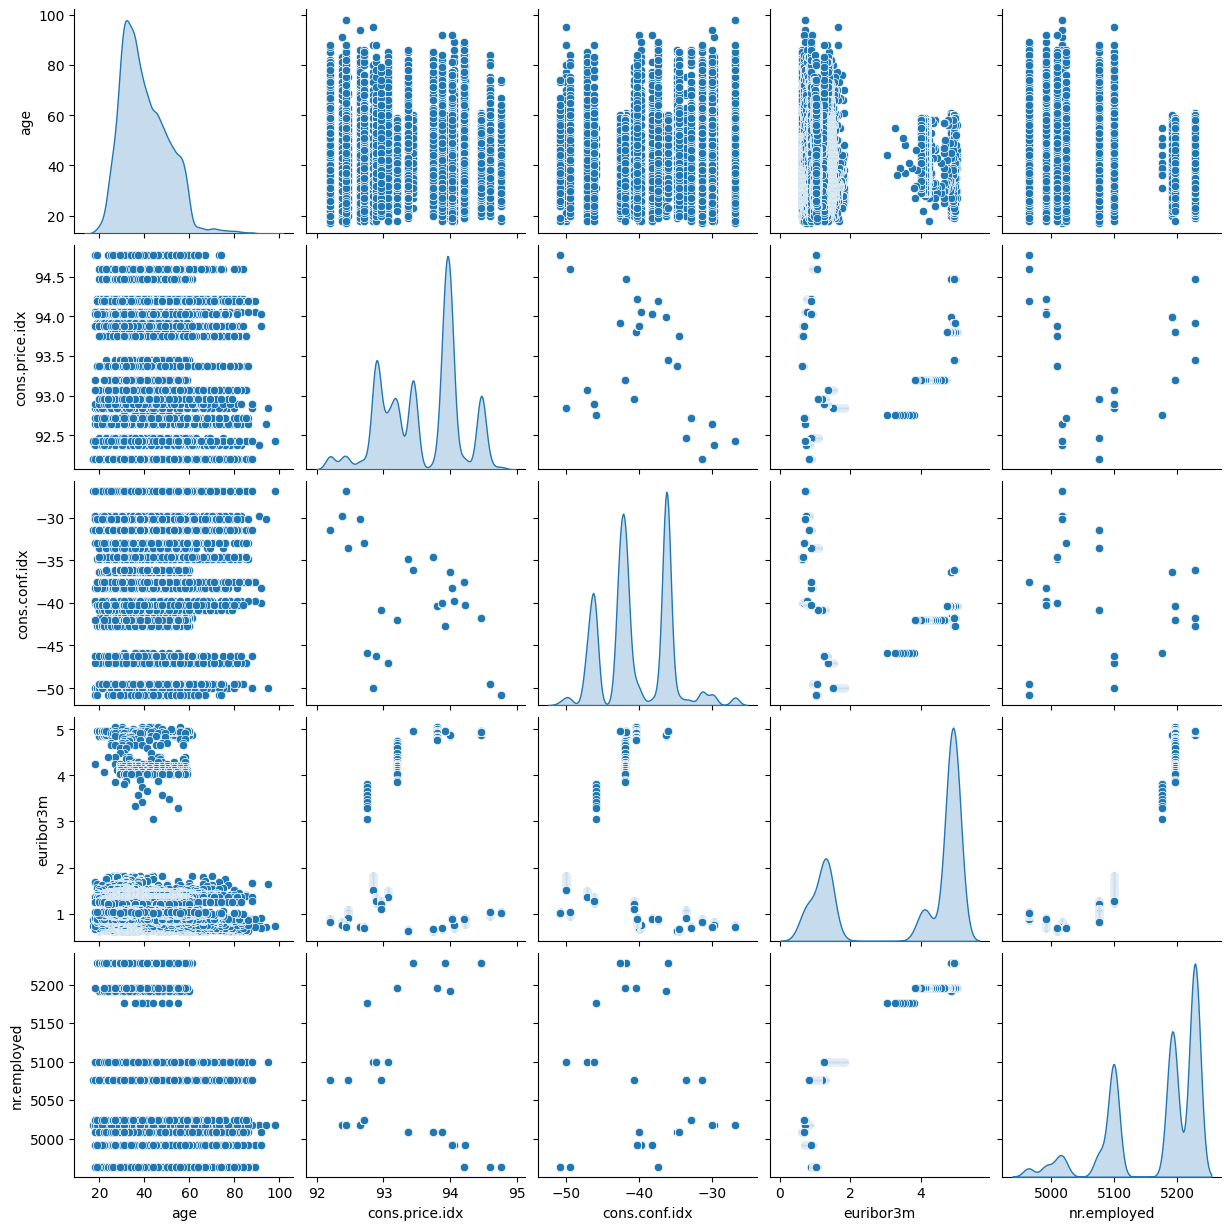

In [13]:

# Select only numerical features from df
selected_features = ["age","cons.price.idx","cons.conf.idx","euribor3m","nr.employed"]  # Choose key numerical features
sns.pairplot(df[selected_features], diag_kind="kde", height=2.5)
plt.show()

- There does seem to be a rough positive correlation between Euribor3m and nr.employed, so I am going to drop nr.employed column.

In [14]:
df.drop(columns=["nr.employed"], inplace=True)

#### Encoding

In [15]:
# Identify categorical features (assumes 'object' dtype)
categorical_features = df.select_dtypes(include=['object']).columns

# One-hot encode categorical features
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Display the transformed dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   month                          41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   y                              41188 non-null  bool   
 10  job_blue-collar                41188 non-null  bool   
 11  job_entrepreneur               41188 non-null  bool   
 12  job_housemaid                  41188 non-null 

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [16]:
# Seperating to features and a label dataframes
X = df.drop(columns=['y'])
y = df['y']

In [17]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Standardizing for Logistical Regression,  KNN and SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [19]:
# Get class distribution
class_counts = df['y'].value_counts(normalize=True)

# Get the baseline accuracy
baseline_accuracy = class_counts.max() * 100

print(f"Baseline Accuracy: {baseline_accuracy:.2f}%")

Baseline Accuracy: 88.73%


So our model should aim to beat 88% accuracy

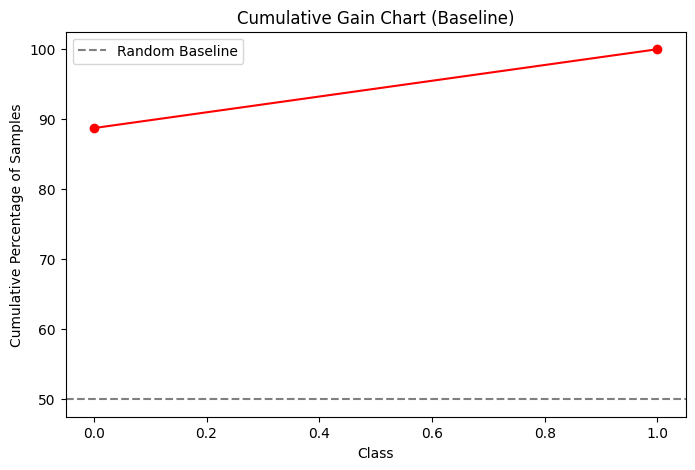

In [20]:
# Create cumulative percentages
sorted_counts = class_counts.sort_values(ascending=False).cumsum() * 100

# Plot Cumulative Gain Chart
plt.figure(figsize=(8, 5))
plt.plot(sorted_counts.index, sorted_counts.values, marker="o", linestyle="-", color="red")
plt.axhline(y=50, color="grey", linestyle="--", label="Random Baseline")
plt.xlabel("Class")
plt.ylabel("Cumulative Percentage of Samples")
plt.title("Cumulative Gain Chart (Baseline)")
plt.legend()
plt.show()

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [21]:
# Initialize and train Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class

### Problem 9: Score the Model

What is the accuracy of your model?

In [22]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.90


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [23]:
def evaluate_models(X_train, X_test, y_train, y_test, models):
    results = []

    # Initialize plot
    plt.figure(figsize=(10, 6))

    for name, model in models.items():
        print(f"Training {name}...")
        start_time = time.time()
        model.fit(X_train, y_train)
        train_time = time.time() - start_time  # Measure training time

        # Get accuracy scores
        train_acc = model.score(X_train, y_train)
        test_acc = model.score(X_test, y_test)

        # Compute ROC curve
        if hasattr(model, "predict_proba"):
            y_probs = model.predict_proba(X_test)[:, 1]  # Probability for positive class
        else:
            y_probs = model.decision_function(X_test)  # Use decision function for SVM

        fpr, tpr, _ = roc_curve(y_test, y_probs)
        auc_score = roc_auc_score(y_test, y_probs)

        # Plot ROC Curve
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

        # Store results
        results.append([name, train_time, train_acc, test_acc, auc_score])

    # Plot diagonal line (random classifier)
    plt.plot([0, 1], [0, 1], "k--", color="black", label="Random Classifier")

    # Formatting the plot
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves for All Models")
    plt.legend()
    plt.grid()
    plt.show()

    # Convert results to DataFrame
    results_df = pd.DataFrame(results, columns=["Model", "Train Time", "Train Accuracy", "Test Accuracy", "AUC Score"])
    
    return results_df




Training LogRegress...
Training KNN...
Training Decision Tree...
Training SVM...


C:\Users\DNIALL\AppData\Local\Temp\ipykernel_9316\3914275991.py:33: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], "k--", color="black", label="Random Classifier")


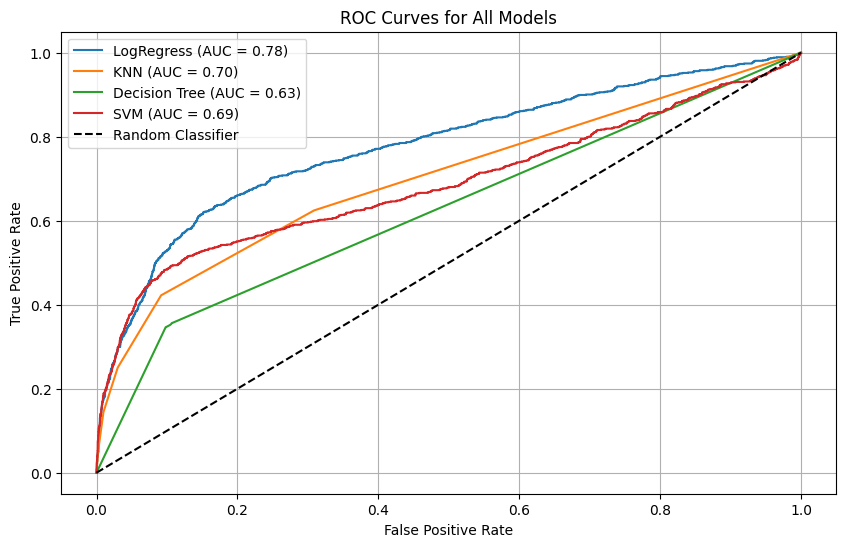

           Model  Train Time  Train Accuracy  Test Accuracy  AUC Score
0     LogRegress    0.241001        0.898513       0.895120   0.776760
1            KNN    0.009998        0.912352       0.888201   0.700591
2  Decision Tree    0.449003        0.994871       0.838553   0.625642
3            SVM  212.703019        0.904977       0.898034   0.688228


In [24]:
models = {
    "LogRegress": log_reg,
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC() # SVM requires scaling
}

# Example usage
results_df = evaluate_models(X_train_scaled, X_test_scaled, y_train, y_test, models)
print(results_df)

So, from above the Logistical Regression model looks like the best, with the highest AUC and training and testing accuracy look identical. However, the riginal data scientists identified the SVM model the best with AUC of 0.938. So we should optimise

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

To answer the first question, I think the dataset we were given has already been feature engineered by the original writers of the paper, as there are much less features than ther mentioned. For instance, they say they dropped 29 features. That said, if I was to iterate again I might add back in the days of the week. Maybe their impact is more important than I thought. But I think I will look at possibly taking out the  previous campaign data, which looks akward to me, and frankly see how that goes.

In [25]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled_df.info()
X_train_scaled_nc = X_train_scaled_df.drop(columns=['campaign', 'pdays', 'previous'])
X_train_scaled_nc.info()
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_test_scaled_nc = X_test_scaled_df.drop(columns=['campaign', 'pdays', 'previous'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            32950 non-null  float64
 1   month                          32950 non-null  float64
 2   campaign                       32950 non-null  float64
 3   pdays                          32950 non-null  float64
 4   previous                       32950 non-null  float64
 5   emp.var.rate                   32950 non-null  float64
 6   cons.price.idx                 32950 non-null  float64
 7   cons.conf.idx                  32950 non-null  float64
 8   euribor3m                      32950 non-null  float64
 9   job_blue-collar                32950 non-null  float64
 10  job_entrepreneur               32950 non-null  float64
 11  job_housemaid                  32950 non-null  float64
 12  job_management                 32950 non-null 

Training LogRegress...
Training KNN...
Training Decision Tree...
Training SVM...


C:\Users\DNIALL\AppData\Local\Temp\ipykernel_9316\3914275991.py:33: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], "k--", color="black", label="Random Classifier")


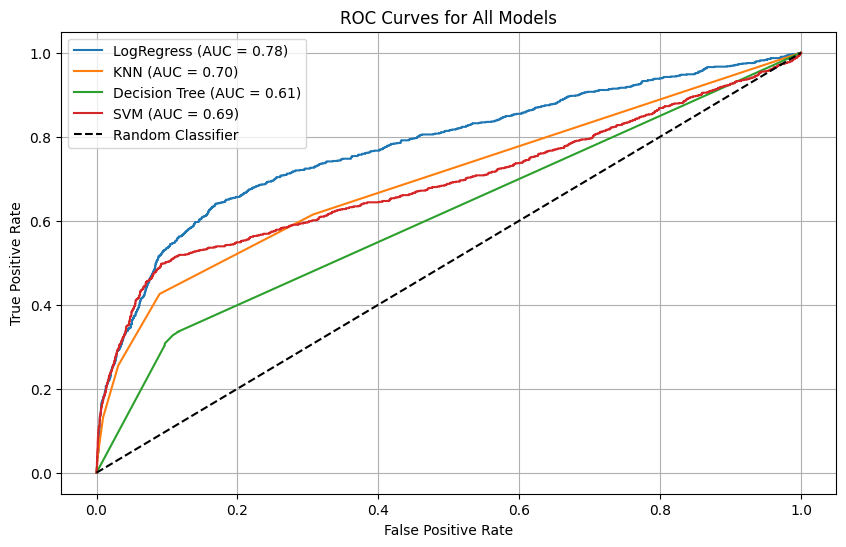

           Model  Train Time  Train Accuracy  Test Accuracy  AUC Score
0     LogRegress    0.136992        0.897845       0.895606   0.776612
1            KNN    0.019001        0.911684       0.888080   0.697407
2  Decision Tree    0.375005        0.987527       0.835397   0.611397
3            SVM  173.303224        0.903338       0.897548   0.691240


In [26]:
results_df = evaluate_models(X_train_scaled_nc, X_test_scaled_nc, y_train, y_test, models)
print(results_df)

So taking out those Features had a ever so slight negative effect on accuracy and AUC score, but did save considerable time on the model generation. So I will do the optimisation of the models on the X_train_scaled_nc dataframe. 

In [27]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [28]:
def evaluate_models_with_search_and_roc(models, param_grids, X_train, X_test, y_train, y_test):
    results = []
    plt.figure(figsize=(10, 6))  # Set figure size for ROC curves

    for model_name, model in models.items():
        print(f"Training {model_name}...")
        start_time = time.time()

        # Hyperparameter tuning
        if model_name in param_grids:
            print(f"Training {model_name}...")
            if model_name == "SVM":  # Use RandomizedSearchCV for SVM
                search = RandomizedSearchCV(model, param_distributions=param_grids[model_name], 
                                            n_iter=5, cv=5, scoring="accuracy", n_jobs=-1, random_state=42)
            else:  # Use GridSearchCV for other models
                search = GridSearchCV(model, param_grid=param_grids[model_name], cv=5, scoring="accuracy", n_jobs=-1)

            search.fit(X_train, y_train)
            best_model = search.best_estimator_
            best_params = search.best_params_
       

            # Model performance
            train_accuracy = best_model.score(X_train, y_train)
            test_accuracy = best_model.score(X_test, y_test)
            elapsed_time = time.time() - start_time

            # ROC Curve
            y_prob = best_model.predict_proba(X_test)[:, 1]  # Get probability scores
            fpr, tpr, _ = roc_curve(y_test, y_prob)  # Compute ROC curve
            roc_auc = auc(fpr, tpr)  # Compute AUC score

        # Plot ROC curve
            plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

        # Store results
            results.append({
                "Model": model_name,
                "Train Time": round(elapsed_time, 2),
                "Train Accuracy": round(train_accuracy, 4),
                "Test Accuracy": round(test_accuracy, 4),
                "AUC": round(roc_auc, 4),
                "Best Params": best_params
            })

    # Finalize ROC Plot
    plt.plot([0, 1], [0, 1], color="grey", linestyle="--")  # Diagonal reference line
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves for Models")
    plt.legend()
    plt.grid()
    plt.show()

    return pd.DataFrame(results)

Training LogRegress...
Training LogRegress...
Training KNN...
Training KNN...
Training Decision Tree...
Training Decision Tree...
Training SVM...


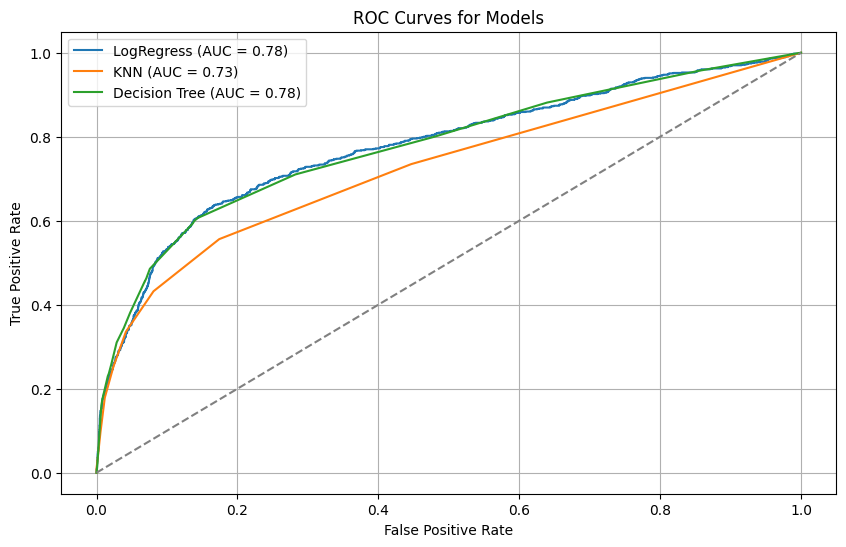

           Model  Train Time  Train Accuracy  Test Accuracy     AUC  \
0     LogRegress       20.23          0.8981         0.8973  0.7770   
1            KNN       84.31          0.9058         0.8939  0.7259   
2  Decision Tree        2.40          0.9029         0.8978  0.7761   

                                Best Params  
0        {'C': 0.01, 'solver': 'liblinear'}  
1  {'n_neighbors': 9, 'weights': 'uniform'}  
2  {'criterion': 'entropy', 'max_depth': 5}  


In [29]:
param_grids = {
    "LogRegress": {"C": [0.01, 0.1, 1, 10], "solver": ["liblinear"]},
    "KNN": {"n_neighbors": [3, 5, 7, 9], "weights": ["uniform", "distance"]},
    "Decision Tree": {"max_depth": [3, 5, 10], "criterion": ["gini", "entropy"]},
}

# Call function and display results
results_df = evaluate_models_with_search_and_roc(models, param_grids, X_train_scaled_nc, X_test_scaled_nc, y_train, y_test)
print(results_df)

In [ ]:
param_grids = {
    "SVM": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]}
}

# Call function and display results
results_df = evaluate_models_with_gridsearch(models, param_grids, X_train_scaled_nc, X_test_scaled_nc, y_train, y_test)
print(results_df)

##### Questions